<a href="https://colab.research.google.com/github/Ashishverma66/Sentiment_Analysis/blob/main/sentiment_Analysis_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install spacy
!python -m spacy download en_core_web_sm
!pip install beautifulsoup4
!pip install textblob
!pip install mlxtend
!pip install git+https://github.com/laxmimerit/preprocess_kgptalkie.git --up
!pip install preprocess_kgptalkie
!pip install googletrans==4.0.0-rc1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 61.1 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.

Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [options] -r <requirements file> [package-index-options] ...
  pip3 install [options] [-e] <vcs project url> ...
  pip3 install [options] [-e] <local project path> ...
  pip3 install [options] <archive url/path> ...

ambiguous option: --up (--upgrade, --upgrade-strategy?)


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import preprocess_kgptalkie as ps

In [45]:
df=pd.read_csv('/content/IMDB-Dataset.csv')

In [46]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [47]:
df.shape

(50000, 2)

In [48]:
df.columns

Index(['review', 'sentiment'], dtype='object')

Pre_Processing

In [51]:
df['word_counts']=df['review'].apply(lambda x:ps.word_count(x))
df['char_counts']=df['review'].apply(lambda x:ps.char_count(x))
df['avg_word_length']=df['review'].apply(lambda x:ps.avg_word_len(x))
df['stop_word_count']=df['review'].apply(lambda x: ps.stop_words_count(x))




In [52]:
df['review']=df['review'].apply(lambda x: ps.remove_html_tags(x))
df['review']=df['review'].str.lower()

In [53]:
df.head()

,review,sentiment,word_counts,char_counts,avg_word_length,stop_word_count
0,one of the other reviewers has mentioned that ...,positive,307,1455,4.739414,147
1,a wonderful little production. the filming tec...,positive,162,837,5.166667,75
2,i thought this was a wonderful way to spend ti...,positive,166,761,4.584337,87
3,basically there's a family where a little boy ...,negative,138,611,4.427536,67
4,"petter mattei's ""love in the time of money"" is...",positive,230,1088,4.730435,111


In [54]:
df['review_without_stopwords']=df['review'].apply(lambda x: ps.remove_stop_words(x))

In [55]:
df.head()

,review,sentiment,word_counts,char_counts,avg_word_length,stop_word_count,review_without_stopwords
0,one of the other reviewers has mentioned that ...,positive,307,1455,4.739414,147,reviewers mentioned watching 1 oz episode you'...
1,a wonderful little production. the filming tec...,positive,162,837,5.166667,75,wonderful little production. filming technique...
2,i thought this was a wonderful way to spend ti...,positive,166,761,4.584337,87,thought wonderful way spend time hot summer we...
3,basically there's a family where a little boy ...,negative,138,611,4.427536,67,basically there's family little boy (jake) thi...
4,"petter mattei's ""love in the time of money"" is...",positive,230,1088,4.730435,111,"petter mattei's ""love time money"" visually stu..."


In [57]:
df.columns

Index(['review', 'sentiment', 'word_counts', 'char_counts', 'avg_word_length',
       'stop_word_count', 'review_without_stopwords'],
      dtype='object')

In [56]:
#####DATA visualization###############

import seaborn as sns


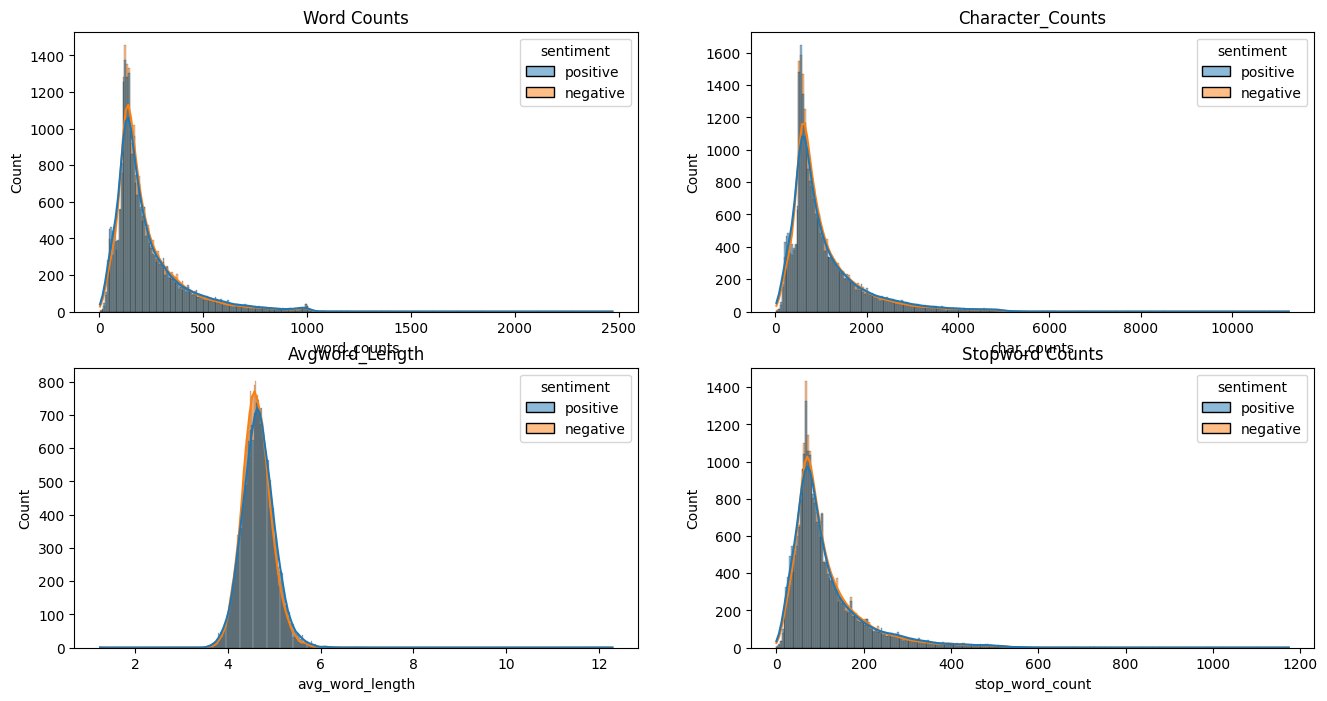

In [65]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
# sns.barplot(x='sentiment', y='word_counts', data=df)
sns.histplot(data=df,x='word_counts', hue='sentiment', kde=True)
plt.title("Word Counts")

plt.subplot(2,2,2)
sns.histplot(data=df,x='char_counts', hue='sentiment', kde=True)
plt.title("Character_Counts")

plt.subplot(2,2,3)
sns.histplot(data=df,x='avg_word_length', hue='sentiment', kde=True)
plt.title("Avgword_Length")

plt.subplot(2,2,4)
sns.histplot(data=df,x='stop_word_count', hue='sentiment', kde=True)
plt.title("Stopword Counts")

plt.show()

In [66]:
#Steps
#train test split---> tfidf-->ml algo--> fit--> prediction-->evaluation

In [67]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix

In [68]:
X_train,X_test,y_train,y_test=train_test_split(df['review'],df['sentiment'],test_size=0.2,random_state=0,
                                               stratify=df['sentiment'])

In [69]:
X_train.shape,X_test.shape

((40000,), (10000,))

In [70]:
clf=Pipeline([('tfidf',TfidfVectorizer()),('clf',LinearSVC())])

In [71]:
clf.fit(X_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', LinearSVC())])

In [73]:
X_train

,review
38414,the notion of marital fidelity portrayed in th...
24010,what a good film! made men is a great action m...
29873,"joe don baker. he was great in ""walking tall"" ..."
2868,monarch cove was one of the best friday night'...
15107,this film is so unbelievable; - the whole prem...
...,...
26219,"in luchino visconti's film death in venice, it..."
46599,total disgrace! truly awful! the screenplay an...
36788,this is yet another gem from the pen of daniel...
5038,i saw this movie when it first came out. it wa...


In [74]:
y_pred=clf.predict(X_test)

In [75]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

    negative       0.91      0.89      0.90      5000
    positive       0.89      0.91      0.90      5000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

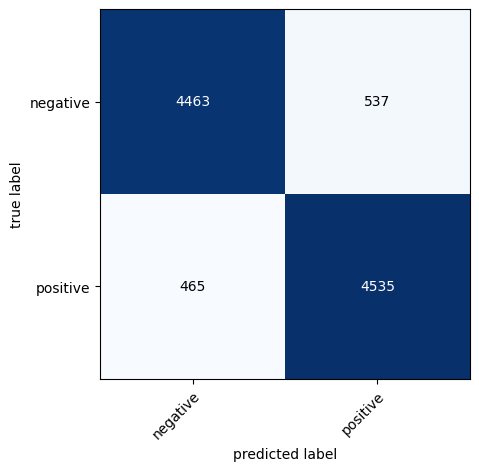

In [79]:
###Ploting Confusion matrix####

from mlxtend.plotting import plot_confusion_matrix
cm=confusion_matrix(y_test,y_pred)
plot_confusion_matrix(cm,class_names=clf.classes_)

In [80]:
clf.predict(['WOW, this is nice'])

array(['positive'], dtype=object)

In [81]:
clf.predict(['it was sub-par'])

array(['negative'], dtype=object)

In [82]:
### ITS ALIVEEEE  ######

In [85]:
import pickle
pickle.dump(clf,open('sentiment_analysis.pkl','wb'))